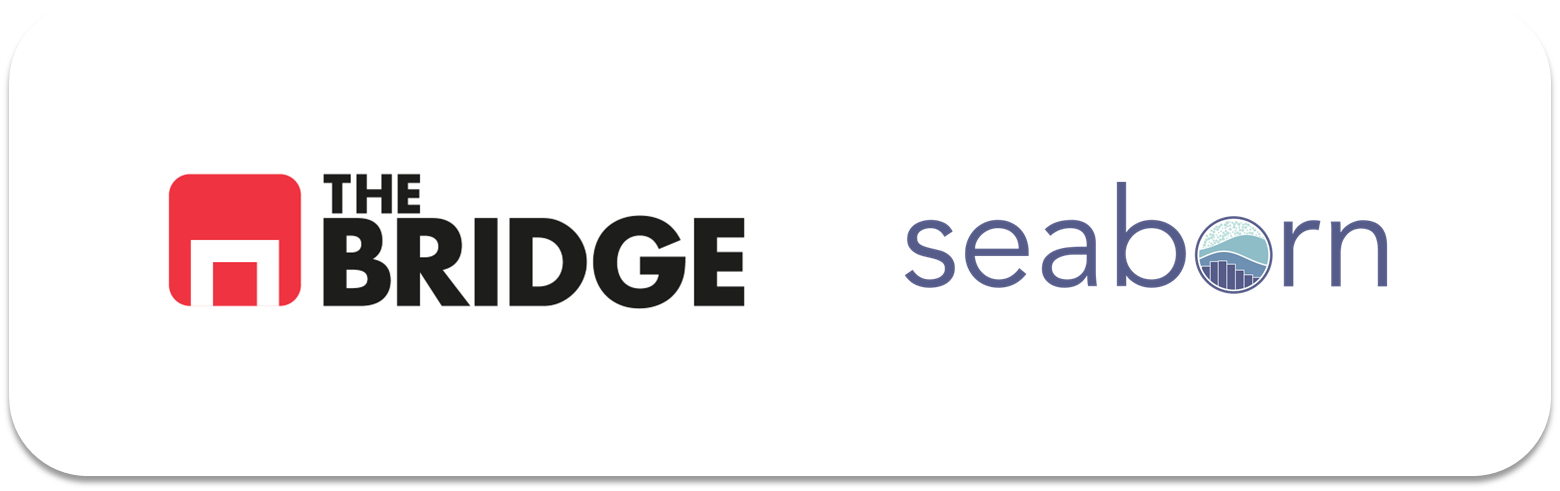

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
df = pd.read_csv("./data/california_cities.csv")

In [3]:
df.sample(5)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
133,133,Eureka,40.801944,-124.163611,NaN,39.0,27191,14.454,9.384,5.070,37.435,24.305,13.130,35.07
285,285,NewportBeach,33.616667,-117.897500,3.0,NaN,85186,52.978,23.805,29.173,137.211,61.654,75.557,55.07
434,434,Tracy,37.738056,-121.433889,16.0,52.0,82922,22.139,22.003,0.136,57.340,56.987,0.352,0.61
431,431,ThousandOaks,34.189444,-118.875000,270.0,886.0,128374,55.181,55.031,0.150,142.918,142.530,0.387,0.27
22,22,Auburn,38.898611,-121.074444,374.0,1227.0,13330,7.166,7.138,0.028,18.560,18.488,0.071,0.38


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [5]:
# cantidad de nulos por columna
df.isna().sum()

Unnamed: 0             0
city                   0
latd                   0
longd                  0
elevation_m           48
elevation_ft          12
population_total       0
area_total_sq_mi       2
area_land_sq_mi        0
area_water_sq_mi       1
area_total_km2         5
area_land_km2          4
area_water_km2         4
area_water_percent     5
dtype: int64

In [6]:
# frecuencia de nulos
df.isna().sum() / len(df)*100

Unnamed: 0            0.000000
city                  0.000000
latd                  0.000000
longd                 0.000000
elevation_m           9.958506
elevation_ft          2.489627
population_total      0.000000
area_total_sq_mi      0.414938
area_land_sq_mi       0.000000
area_water_sq_mi      0.207469
area_total_km2        1.037344
area_land_km2         0.829876
area_water_km2        0.829876
area_water_percent    1.037344
dtype: float64

In [9]:
# Limpiar nulos en elevation_m, elevation_ft, area_total_sq_mi, areq_water_sq_mi, area_total_km2, area_land_km2, area_water_km2 y area_water_percent
df.dropna(inplace=True) # cualquier fila con un nulo se elimina

In [10]:
df.info()
# 427 registros de ciudades libres de nulos

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [22]:
df["log_poblacion"] = np.log10(df["population_total"])

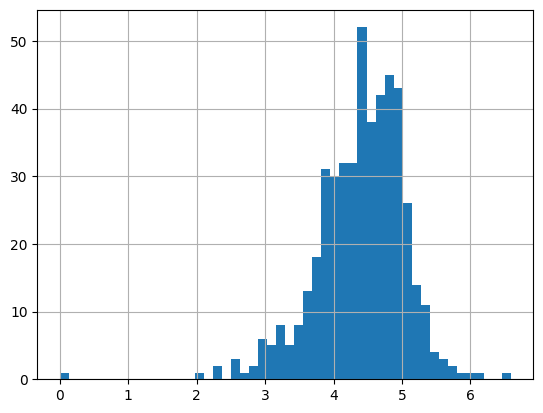

In [ ]:
df["log_poblacion"].hist(bins=50)
df.loc[df["population_total"] < 100,"city"]
df.loc[df["city"] == "Pomona","population_total"] = 145502

In [32]:
df["log_poblacion"] = np.log10(df["population_total"])

<Axes: >

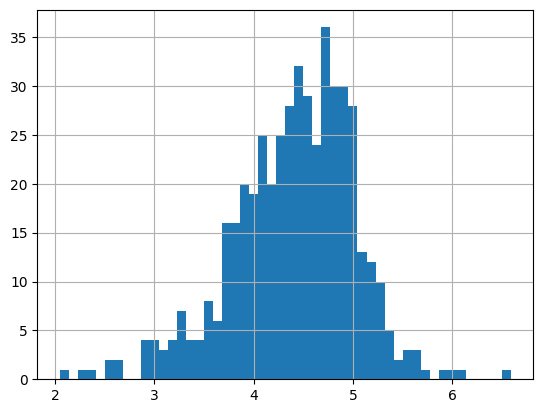

In [33]:
df["log_poblacion"].hist(bins=50)

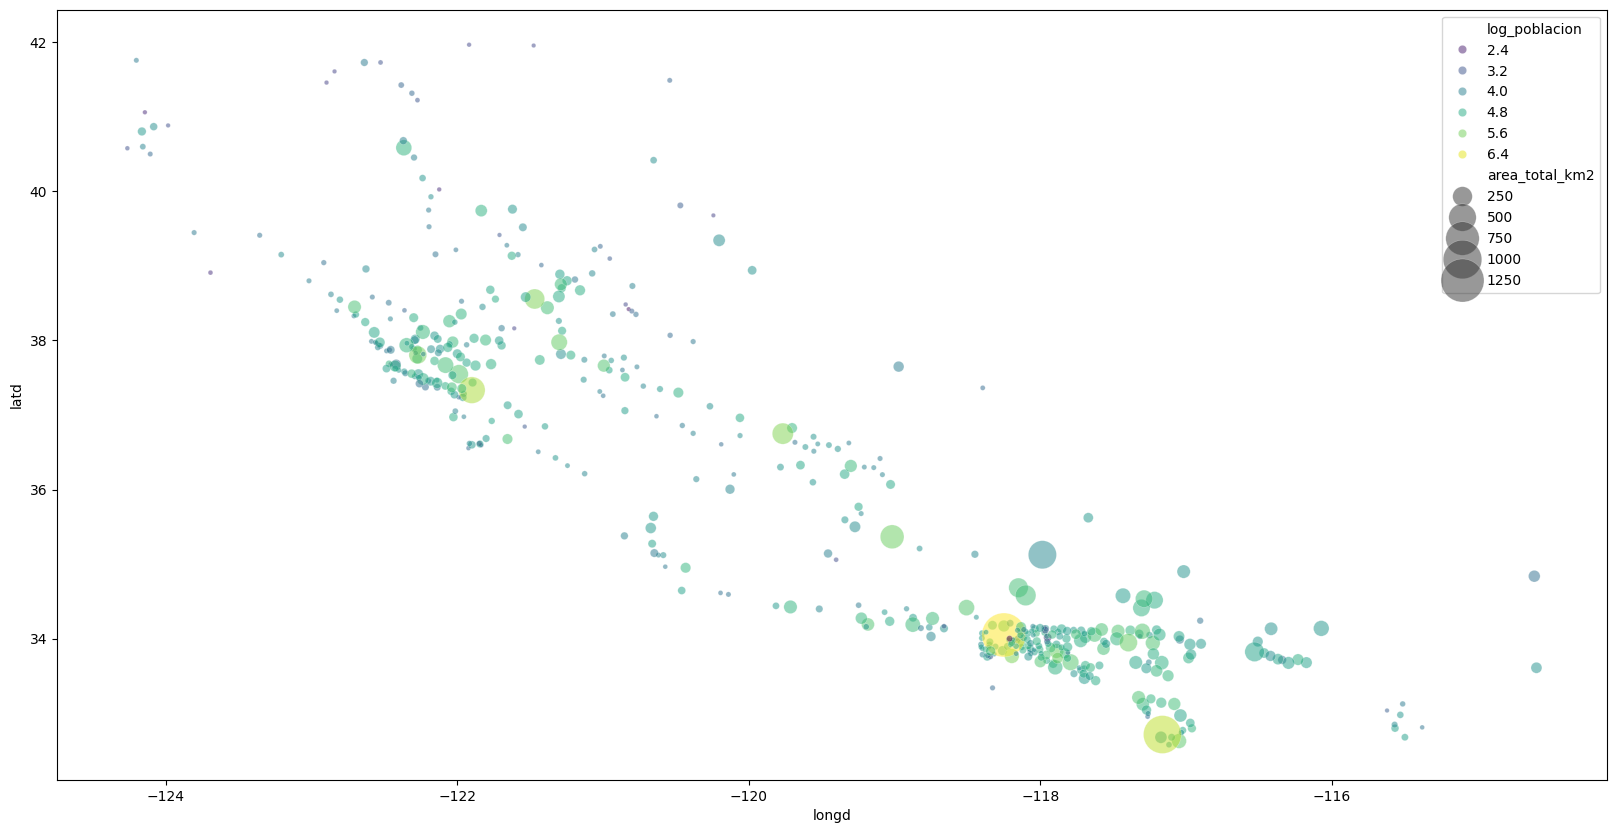

In [43]:
fig, axs = plt.subplots(figsize=(20,10)) # definimos figura orientada a objetos

sns.scatterplot(data=df,
                x="longd",
                y="latd",
                hue="log_poblacion",# se le puede asignar una columan categórica
                size = "area_total_km2",
                sizes=(10,1000), # establece los límtes para definir los tamaños
                palette='viridis',
                alpha = 0.5,
                ax = axs)

plt.show() #comando de cierre para que pinte

In [44]:
# SOL LIVE REVIEW:
def scatter_plot_with_controls(df, x_col, y_col, color_col = None, size_col = "", scale= 1, legend= True):

    fig, ax = plt.subplots(figsize=(20,10))
    sizes=(10,1000)

    if type(size_col) == str:
        if size_col != "":
            if color_col:
                scatter = sns.scatterplot(data = df,
                                          x = x_col, 
                                          y = y_col, 
                                          size = df[size_col] * scale, 
                                          hue = color_col, 
                                          alpha = 0.5, 
                                          palette = "viridis", 
                                          ax = ax, 
                                          sizes = sizes)
            else:
                scatter = sns.scatterplot(data = df,
                                          x = x_col, 
                                          y = y_col, 
                                          size = df[size_col] * scale, 
                                          alpha = 0.5, 
                                        #   palette = "viridis", 
                                          ax = ax, 
                                          sizes = sizes)
        elif color_col:
            scatter = sns.scatterplot(data = df,
                                      x = x_col, 
                                      y = y_col, 
                                      hue = color_col, 
                                      alpha=0.5, 
                                      palette='viridis', 
                                      ax = ax, 
                                      sizes = sizes)
        
    else:
        scatter = sns.scatterplot(data = df,
                                  x = x_col, 
                                  y = y_col, 
                                  size = size_col, 
                                  alpha=0.5, 
                                #   palette='viridis', 
                                  ax = ax, 
                                  sizes = sizes)
    
    if legend:
        ax.legend(ncol = 2, loc="upper right", frameon = False, labelspacing = 1.5)

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

    return ax

<Axes: xlabel='longd', ylabel='latd'>

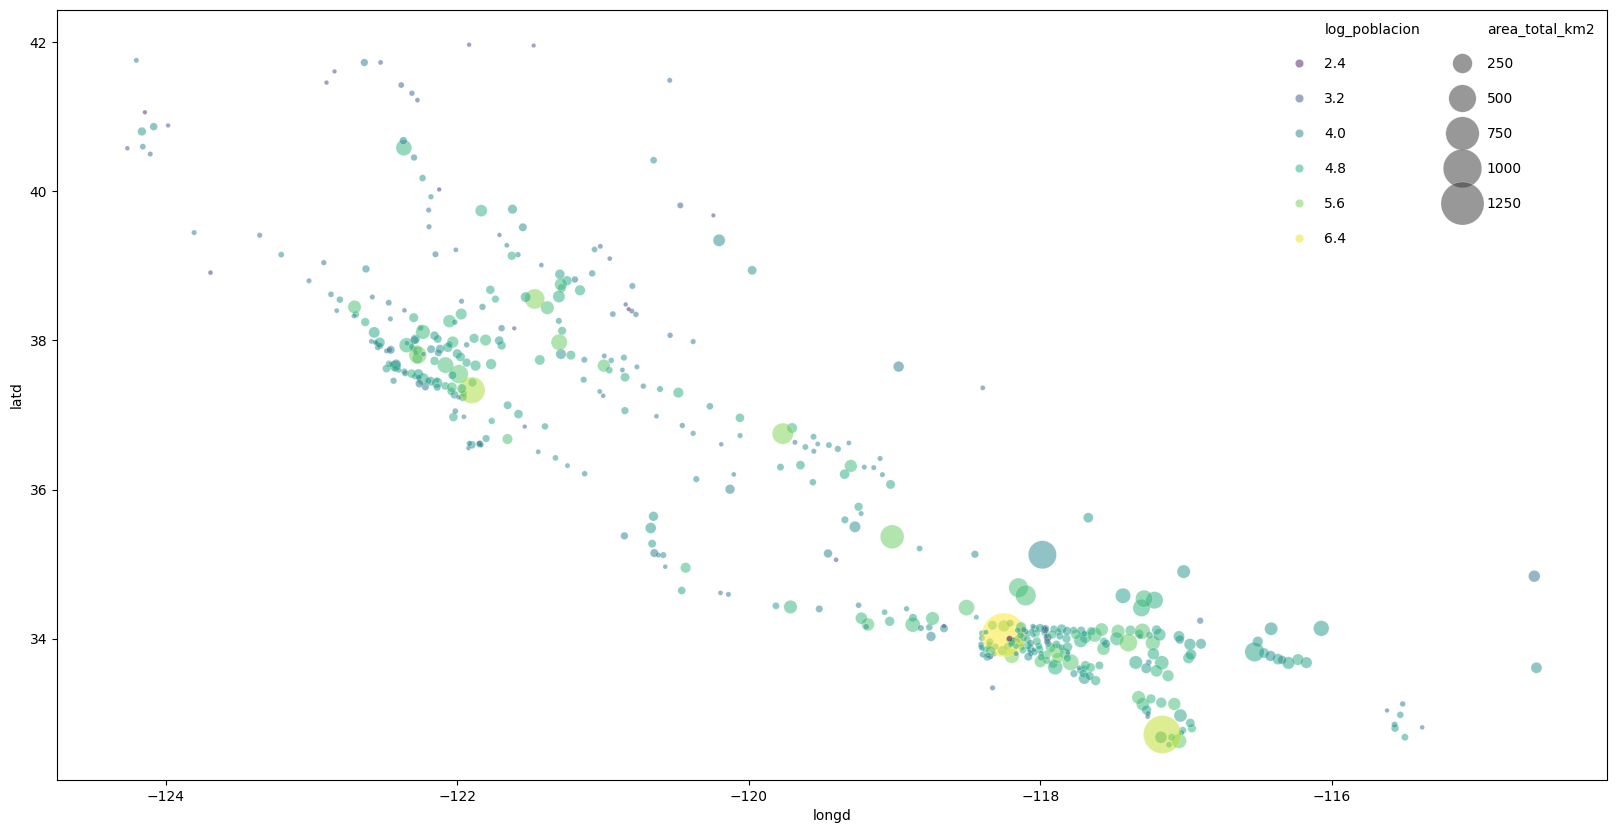

In [47]:
scatter_plot_with_controls(
    df=df, 
    x_col='longd', 
    y_col='latd', 
    color_col ='log_poblacion', 
    size_col ='area_total_km2',   # Ajuste de escala para tamaños manejables
    legend=True
)

In [30]:
def scatter_plot_v2(df, col_num1, col_num2, col_cat=None, point_size=50, scale=1, show_legend=True):
    """
    Dibuja un diagrama de dispersión entre dos columnas numéricas, opcionalmente coloreando y ajustando el tamaño de los puntos.
    
    Args:
        df (pd.DataFrame): DataFrame que contiene los datos.
        col_num1 (str): Nombre de la primera columna numérica (eje X).
        col_num2 (str): Nombre de la segunda columna numérica (eje Y).
        col_cat (str, opcional): Nombre de la columna categórica para colorear. Default: None.
        point_size (int o str): Tamaño fijo de los puntos o nombre de una columna que controla el tamaño. Default: 50.
        scale (float): Factor para escalar los tamaños de los puntos si `point_size` es una columna. Default: 1.
        show_legend (bool): Controla si se muestra la leyenda. Default: True.
    """
    plt.figure(figsize=(10, 6))
    
    # Determinar el tamaño de los puntos
    if isinstance(point_size, str):  # Si point_size es una columna
        if point_size in df.columns:
            sizes = df[point_size] * scale
        else:
            raise ValueError(f"La columna '{point_size}' no existe en el DataFrame.")
    else:  # Si point_size es un valor numérico
        sizes = point_size

    # Crear el gráfico
    if col_cat:
        sns.scatterplot(
            data=df, x=col_num1, y=col_num2, hue=col_cat, size=sizes, sizes=(10, 200), palette='viridis', alpha=0.5
        )
        if show_legend:
            plt.legend(title=col_cat, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        sns.scatterplot(
            data=df, x=col_num1, y=col_num2, size=sizes, sizes=(10, 200), color="blue", alpha=0.5
        )
        if show_legend:
            plt.legend(title="Tamaño", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Etiquetas y título
    plt.title(f'Diagrama de dispersión: {col_num1} vs {col_num2}', fontsize=14)
    plt.xlabel(col_num1, fontsize=12)
    plt.ylabel(col_num2, fontsize=12)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()
    

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

In [20]:
df["log_poblacion"] = np.log10(df["population_total"])

In [15]:
df.sample(2)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,log_poblacion
247,247,ManhattanBeach,33.888889,-118.405278,20.0,67.0,35135,3.941,3.937,0.004,10.208,10.197,0.01,0.1,4.545740
115,115,DosPalos,36.983333,-120.633333,362.0,118.0,4950,1.350,1.350,0.000,3.496,3.496,0.00,0.0,3.694605


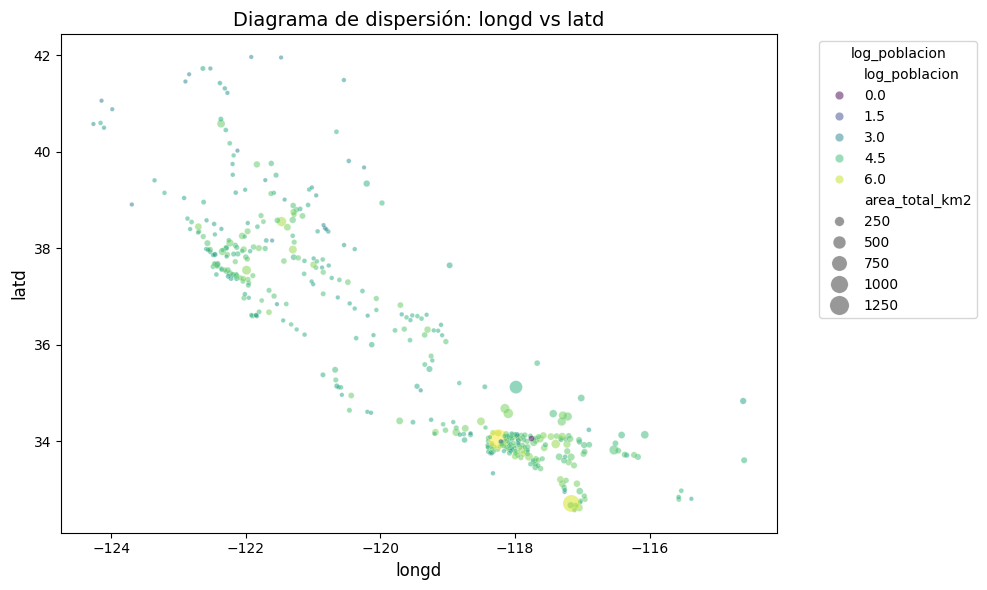

In [31]:
scatter_plot_v2(
    df=df, 
    col_num1='longd', 
    col_num2='latd', 
    col_cat='log_poblacion', 
    point_size='area_total_km2',   # Ajuste de escala para tamaños manejables
    show_legend=True
)

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

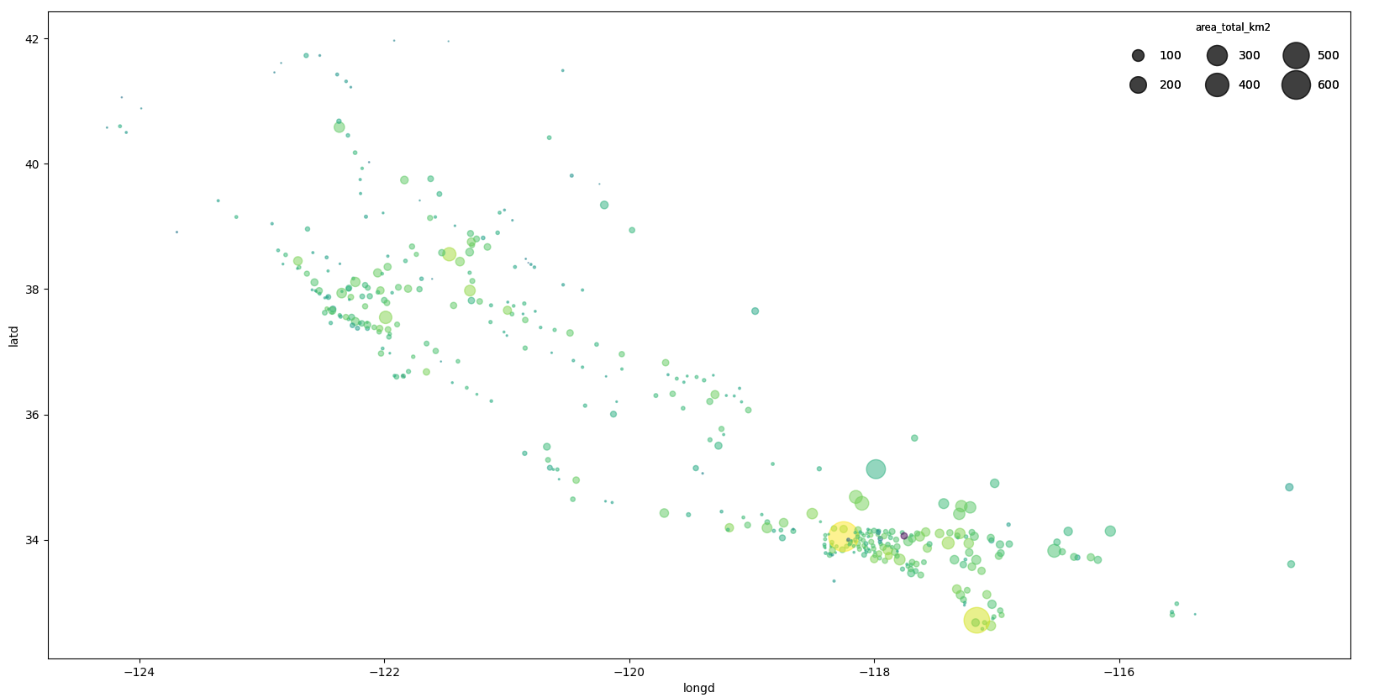

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [39]:
df = pd.read_csv("./data/titanic.csv")

In [40]:
df.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
197,0,3,male,42.0,0,1,8.4042,S,Third,man,True,NaN,Southampton,no,False
91,0,3,male,20.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


1- El titanic fue un accidente con una tasa de mortalidad alta.  


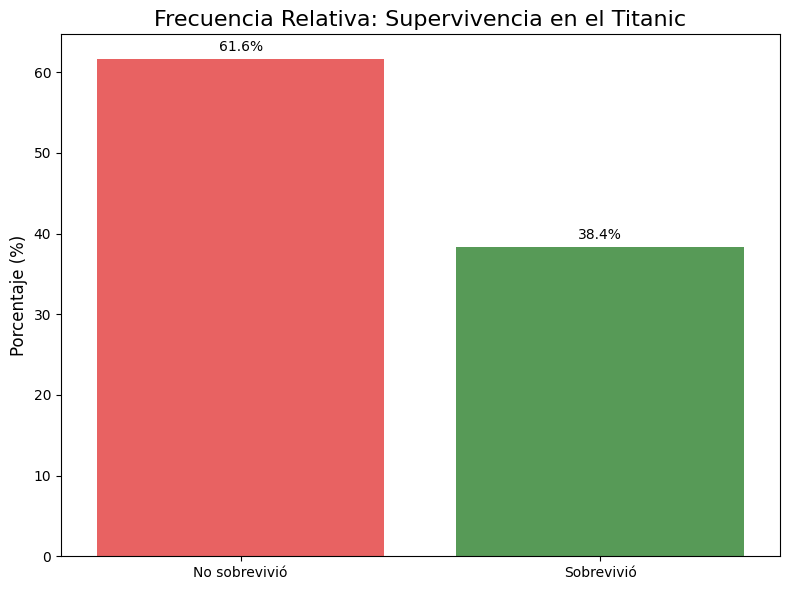

In [52]:
# Calcular las frecuencias relativas
relative_frequencies = df['alive'].value_counts(normalize=True).reset_index()
relative_frequencies.columns = ['alive', 'frequency']
relative_frequencies['frequency'] *= 100  # Convertir a porcentaje

# Crear el gráfico con sns.barplot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=relative_frequencies,
    x='alive',
    y='frequency',
    hue='alive',  # Usar hue para mapear la paleta
    dodge=False,  # Evitar separación en barras al usar hue
    palette=['red', 'green'],  # Paleta personalizada
    alpha=0.7
)

# Añadir etiquetas y título
plt.title('Frecuencia Relativa: Supervivencia en el Titanic', fontsize=16)
# plt.xlabel('Supervivencia (0 = No sobrevivió, 1 = Sobrevivió)', fontsize=12)
plt.xlabel("")
plt.ylabel('Porcentaje (%)', fontsize=12)

# Eliminar la leyenda ya que no es necesaria
plt.legend([], [], frameon=False)

# Mostrar porcentajes sobre las barras
for index, row in relative_frequencies.iterrows():
    plt.text(index, row['frequency'] + 1, f'{row["frequency"]:.1f}%', ha='center', fontsize=10)

# Personalizar el eje x para mostrar los valores originales
plt.xticks(ticks=[0, 1], labels=['No sobrevivió', 'Sobrevivió'])  # Etiquetas descriptivas

# Mostrar gráfico
plt.tight_layout()
plt.show()

2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  


3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  


4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    


<Figure size 800x600 with 0 Axes>

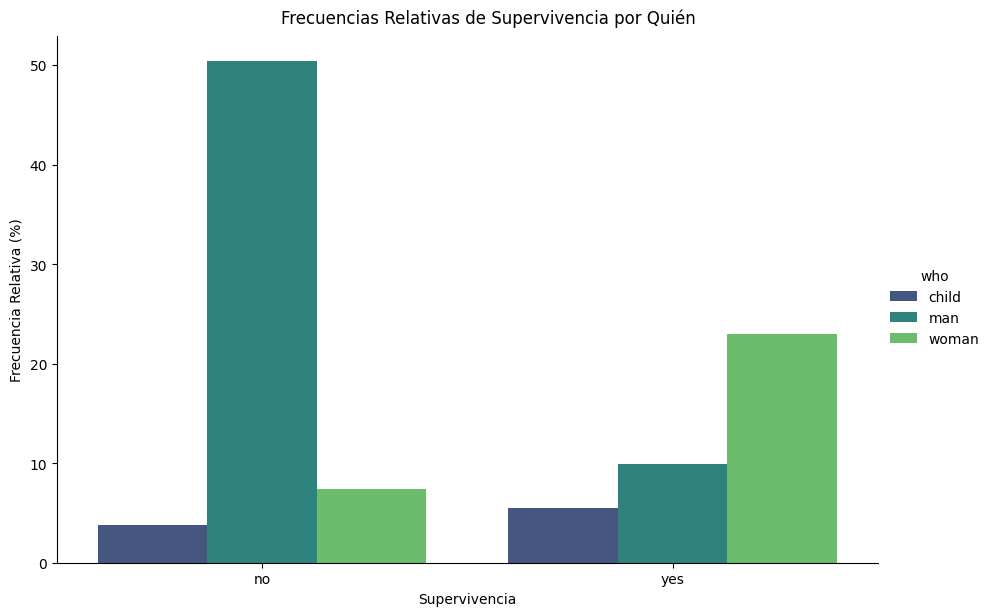

In [65]:
# Calcular frecuencias relativas
df_relative = df.groupby(['alive', 'who']).size().reset_index(name='counts')
df_relative['relative_frequency'] = df_relative['counts'] / df_relative['counts'].sum() * 100

plt.figure(figsize=(8, 6))

# Graficar con frecuencias relativas
g = sns.catplot(
    x="alive",
    y="relative_frequency",
    hue="who",
    data=df_relative,
    kind="bar",
    palette="viridis",
    height=6,
    aspect=1.5
)

# Etiquetas y título
g.set_axis_labels("Supervivencia", "Frecuencia Relativa (%)")
g.fig.suptitle("Frecuencias Relativas de Supervivencia por Quién", y=1.02)

plt.show()

<Figure size 800x600 with 0 Axes>

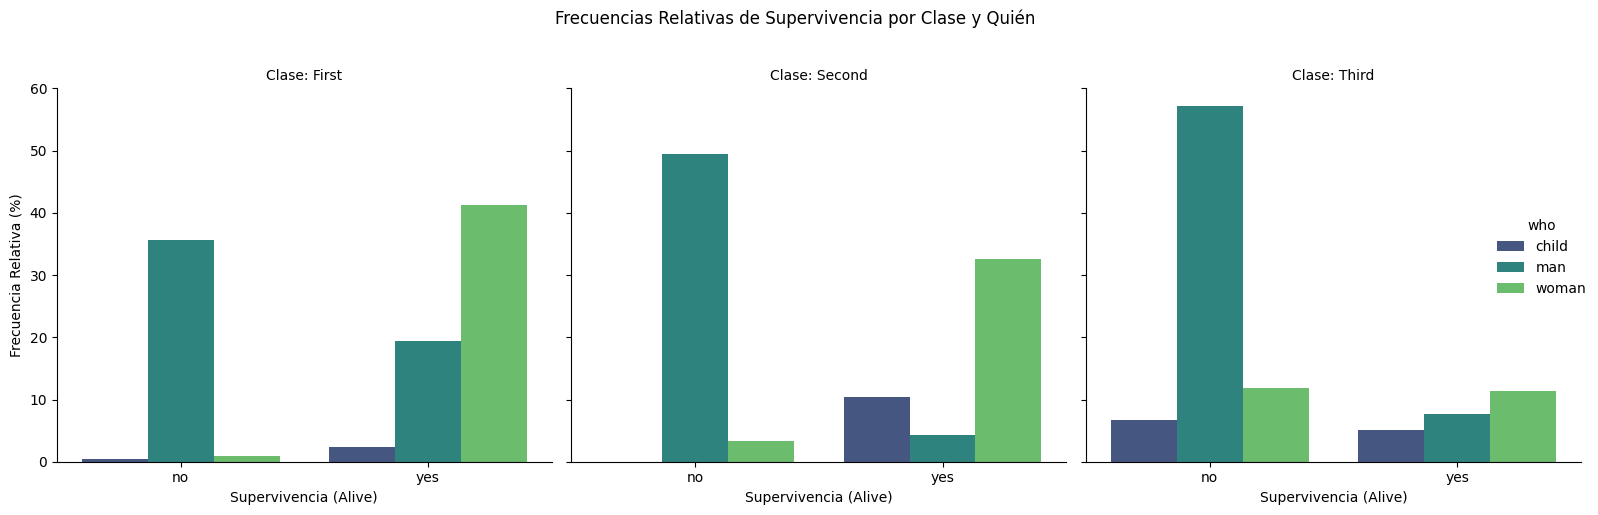

In [61]:
# Calcular frecuencias relativas
df_relative = df.groupby(['class', 'alive', 'who']).size().reset_index(name='counts')
df_relative['relative_frequency'] = df_relative.groupby(['class'])['counts'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(8, 6));

# Graficar con frecuencias relativas
g = sns.catplot(
    x="alive",
    y="relative_frequency",
    col="class",
    hue="who",
    data=df_relative,
    kind="bar",
    palette="viridis",
    height=5,
    aspect=1
)

# Añadir etiquetas y título
g.set_axis_labels("Supervivencia (Alive)", "Frecuencia Relativa (%)")
g.set_titles("Clase: {col_name}")
g.fig.suptitle("Frecuencias Relativas de Supervivencia por Clase y Quién", y=1.02)
plt.tight_layout()
plt.show();


5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

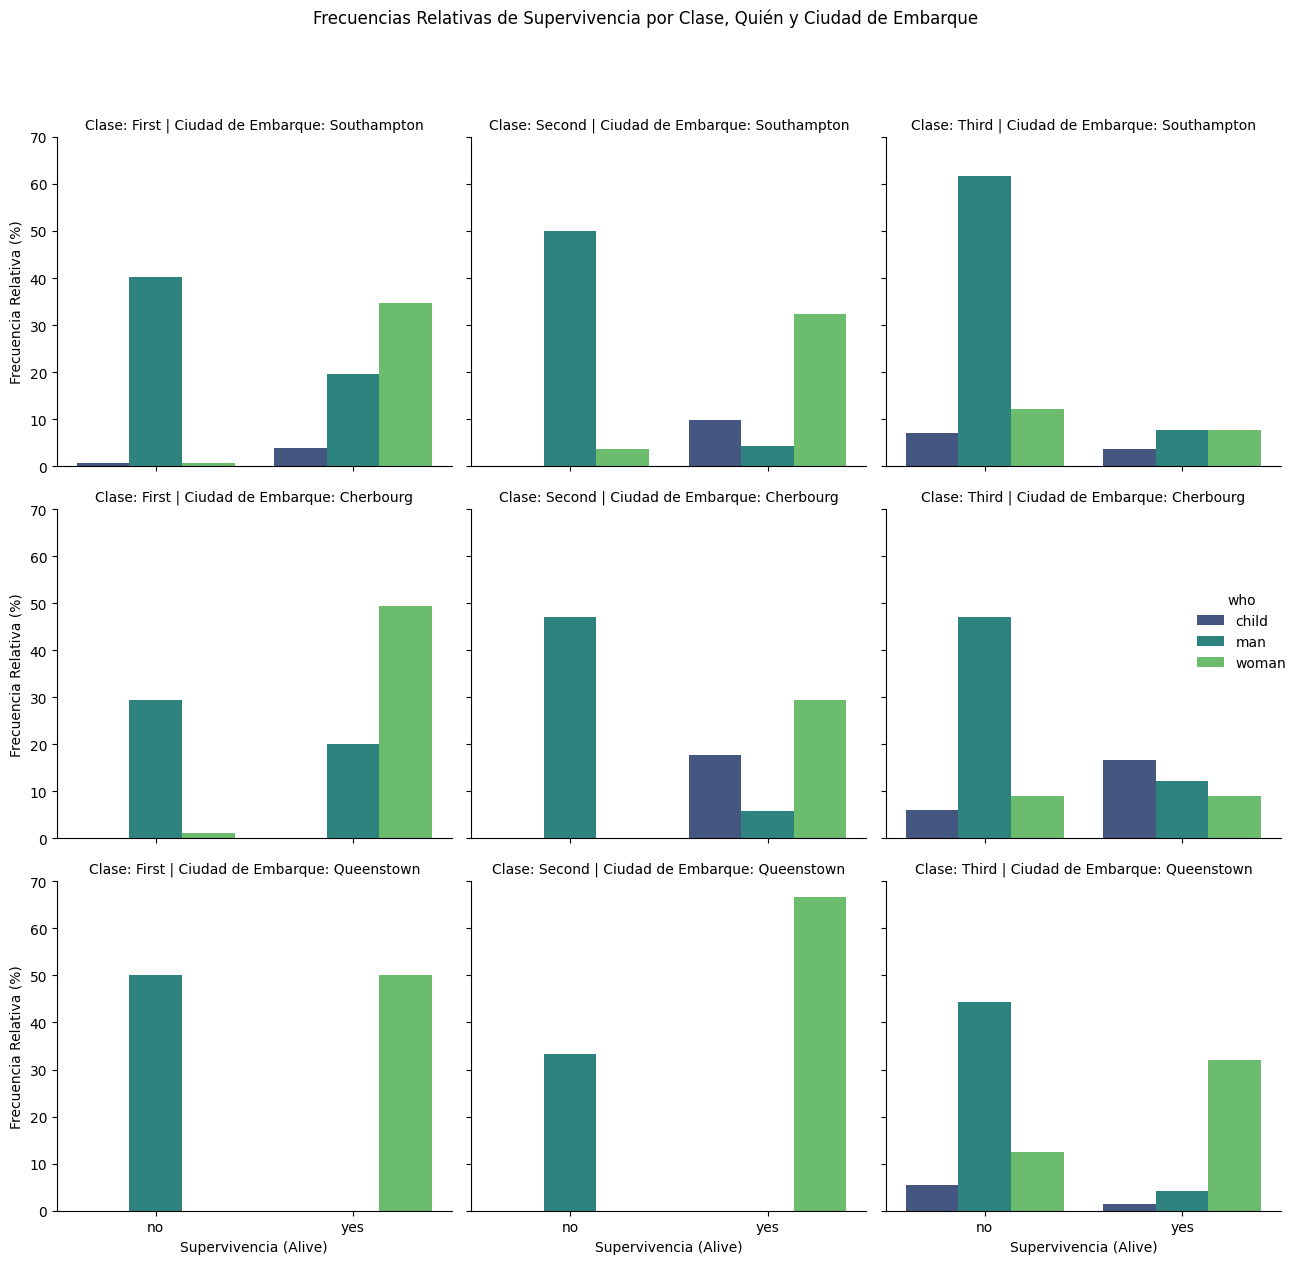

In [66]:
# Calcular frecuencias relativas
df_relative = df.groupby(['class', 'alive', 'who', 'embark_town']).size().reset_index(name='counts')
df_relative['relative_frequency'] = df_relative.groupby(['class', 'embark_town'])['counts'].transform(lambda x: x / x.sum() * 100)

# Graficar con frecuencias relativas
g = sns.catplot(
    x="alive",
    y="relative_frequency",
    col="class",
    row="embark_town",
    hue="who",
    data=df_relative,
    kind="bar",
    palette="viridis",
    height=4,
    aspect=1
)

# Añadir etiquetas y título
g.set_axis_labels("Supervivencia (Alive)", "Frecuencia Relativa (%)")
g.set_titles("Clase: {col_name} | Ciudad de Embarque: {row_name}")
g.fig.suptitle("Frecuencias Relativas de Supervivencia por Clase, Quién y Ciudad de Embarque", y=1.05)
plt.tight_layout()
plt.show()
